In [49]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [50]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [64]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

u0 = numpy.zeros(nx)

#Define array for x
x = numpy.empty(nx)
for i in range (1, nx):
    x[i] = x[0] + i*dx
    
u0 = u_initial()

In [65]:
#Task 1: Define function for initializing waveform
def u_initial():
    u = numpy.zeros(nx)
    for i in range (nx):
        if (x[i] >= 0.0 and x[i] <= 2.0):
            u[i] = 1.0
    return u

In [66]:
computeF = lambda u: (u/2)**2

#Task 2: computeF creates a symbolic function prototype that returns 0.5*u^2 for parameter u/

In [91]:
#Task 3: Define MacCormack scheme

#MacCormack Scheme
def maccormack(u, nt, dt, dx):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    eps = 0.3
    
    for i in range(1,nt):
        F = computeF(u)
        
        #Predictor step with damping
        ustar[1:-1] = u[1:-1] - dt/dx*(F[2:nx]- F[1:-1]) + \
                    eps*(u[:-2] - 2*u[1:-1] + u[2:nx])
        
        Fstar = computeF(ustar)
        
        #Corrector step
        un[i][1:nx] = 0.5*(u[1:nx] + ustar[1:nx] -dt/dx* \
                           (Fstar[1:nx] - Fstar[:-1]))
        
        u = un[i].copy()
        
    return un

In [92]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,


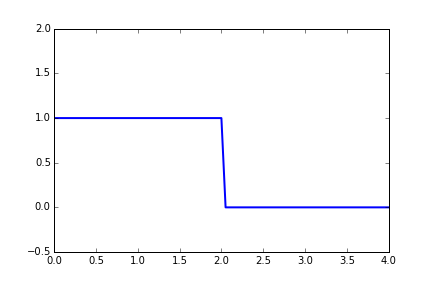
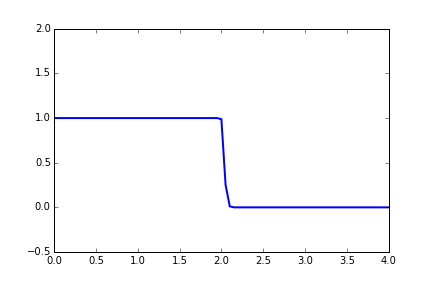
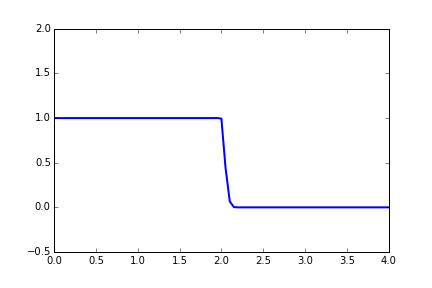
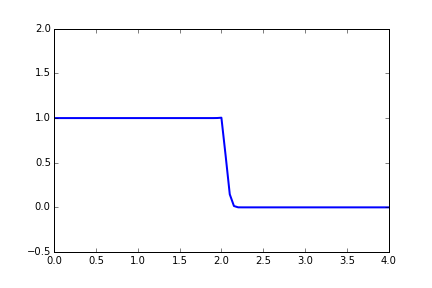
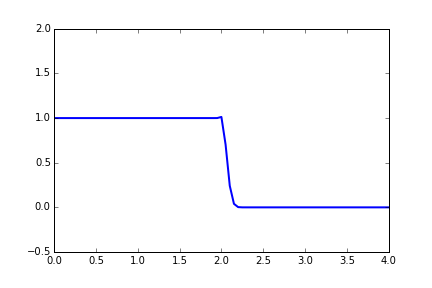
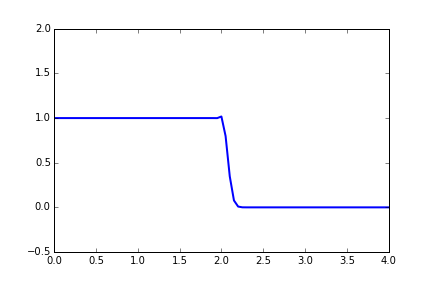
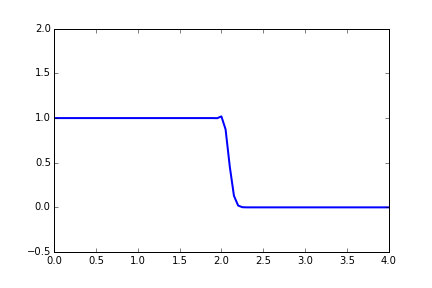
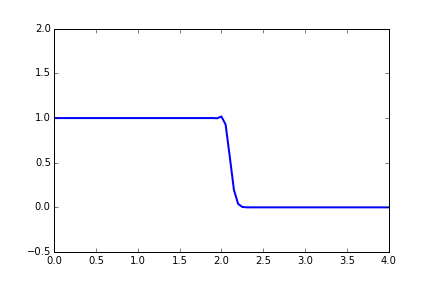
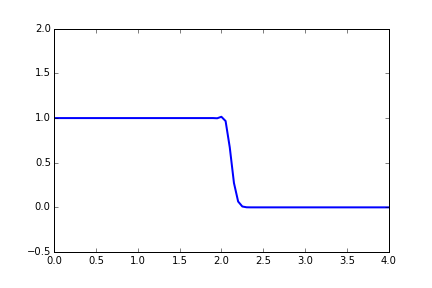
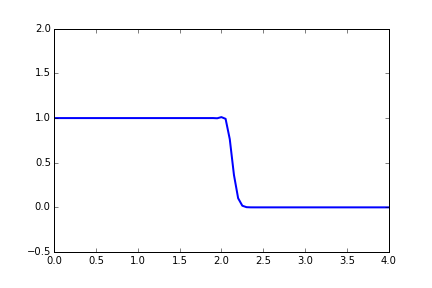
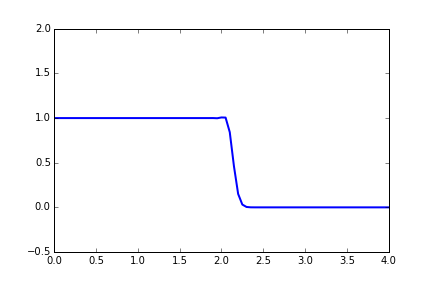
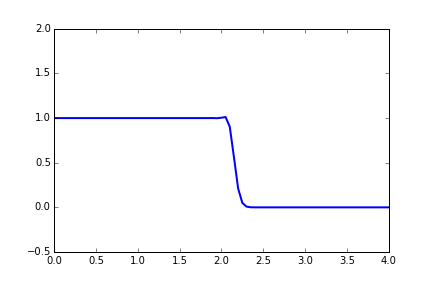
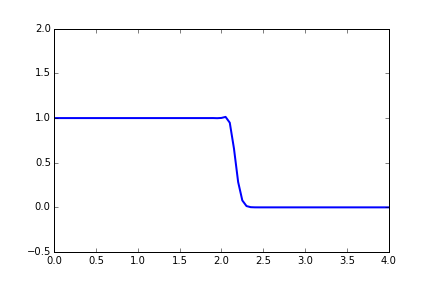
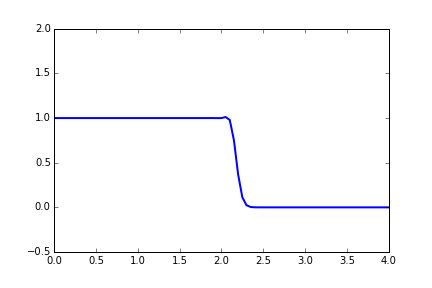
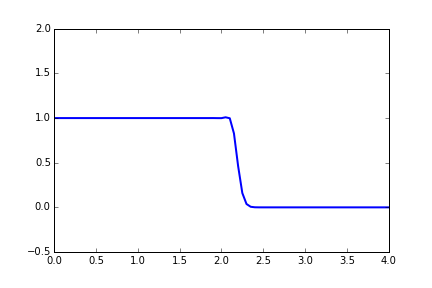
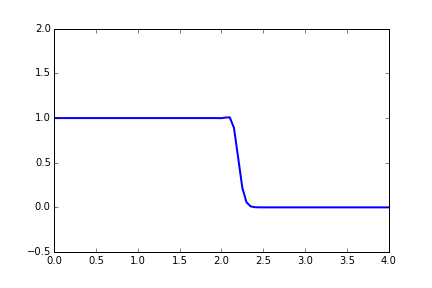
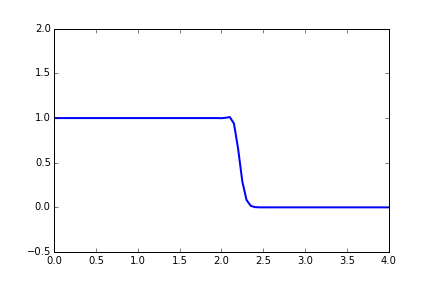
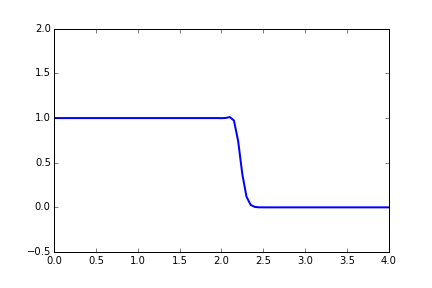
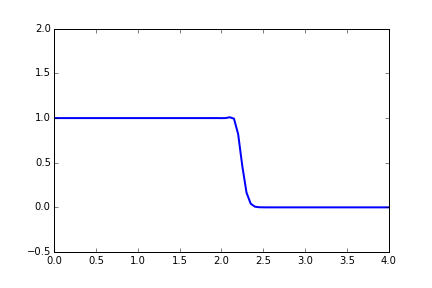
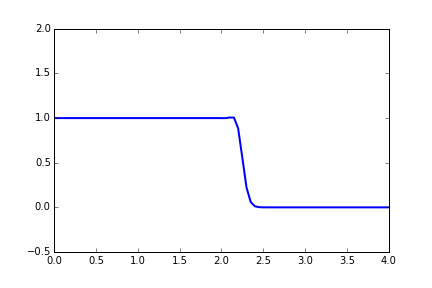
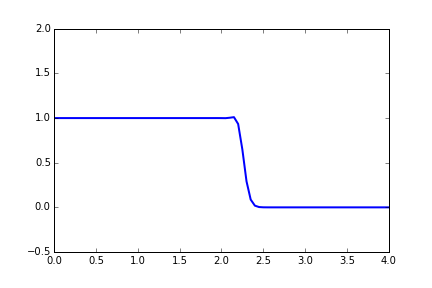
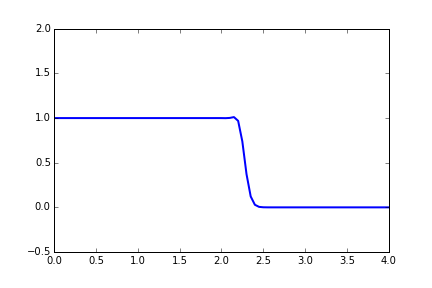
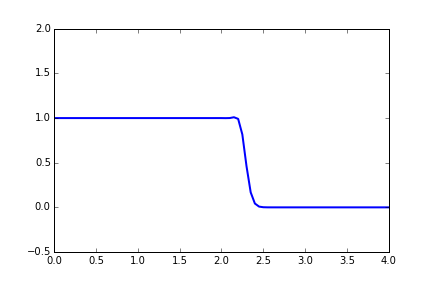
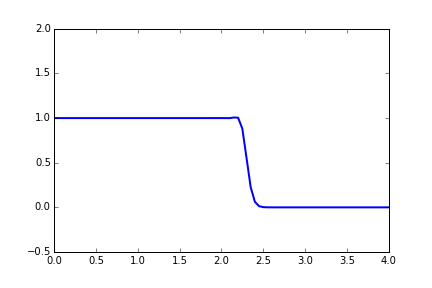
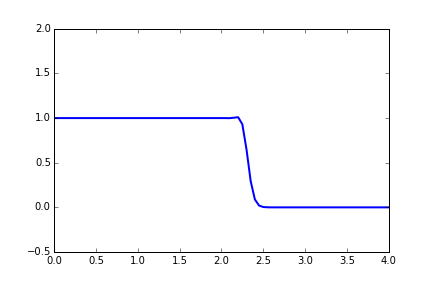
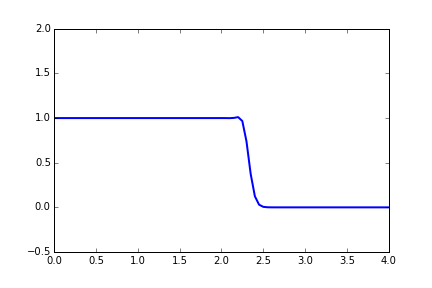
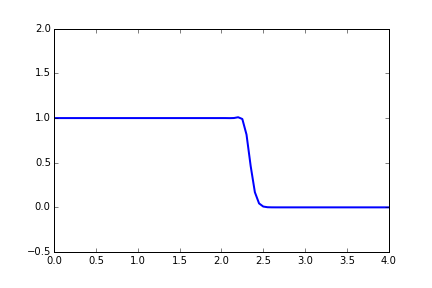
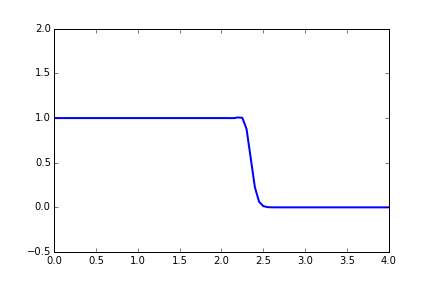
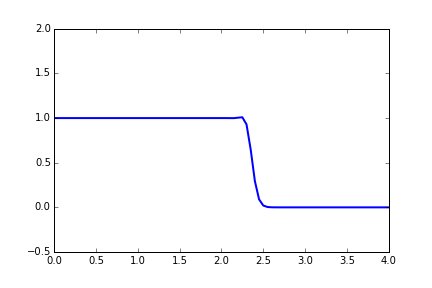
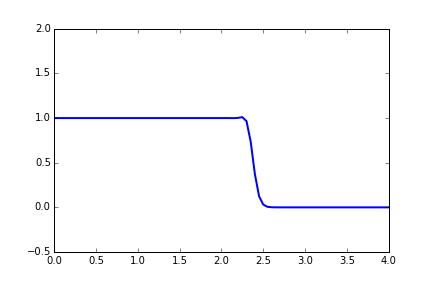
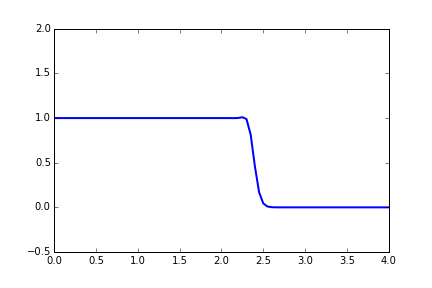
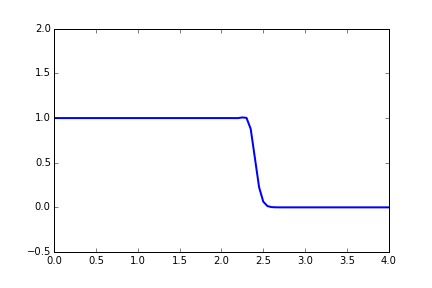
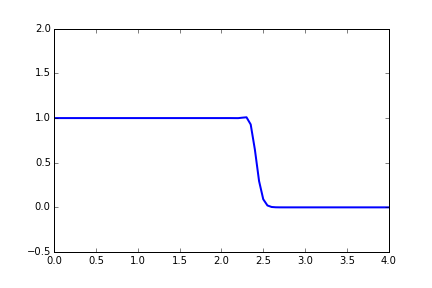
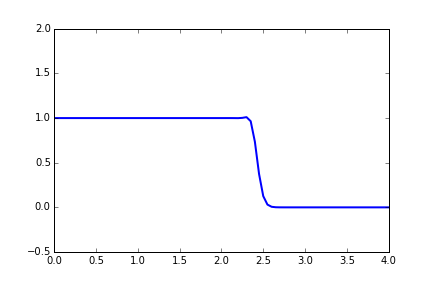
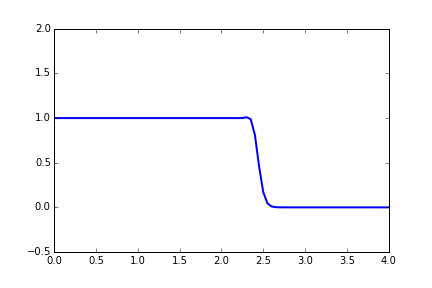
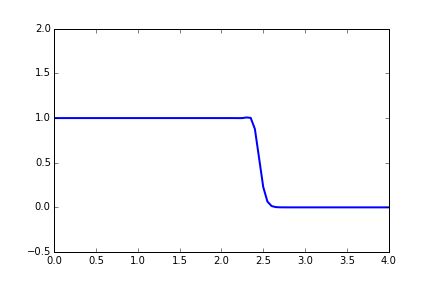
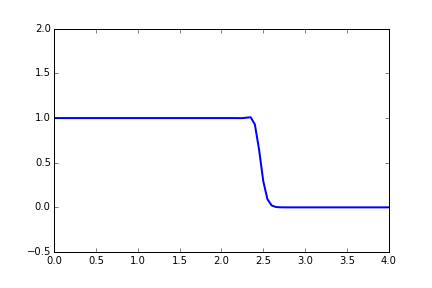
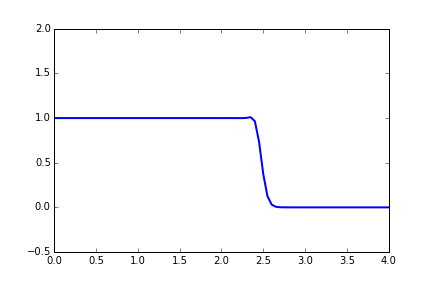
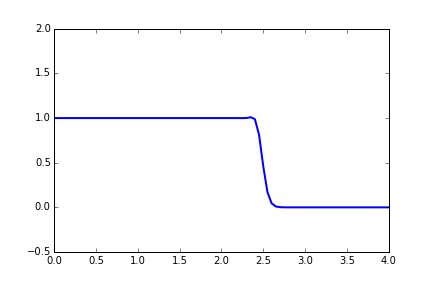
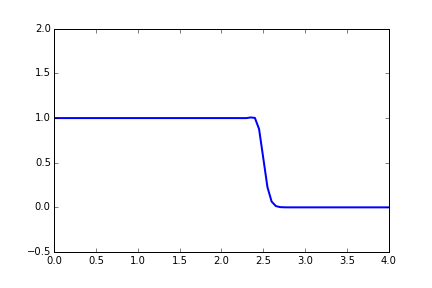
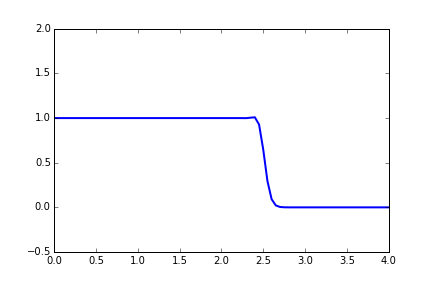
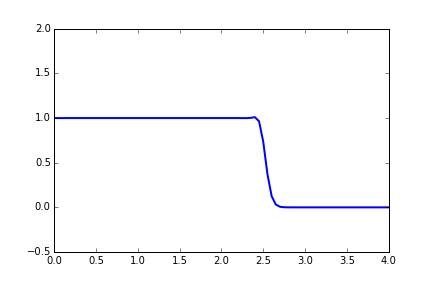
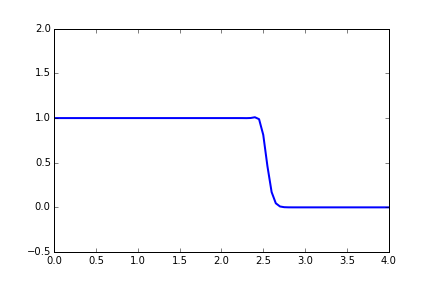
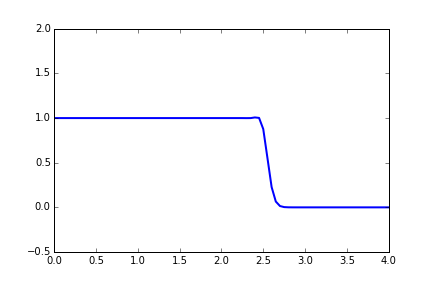
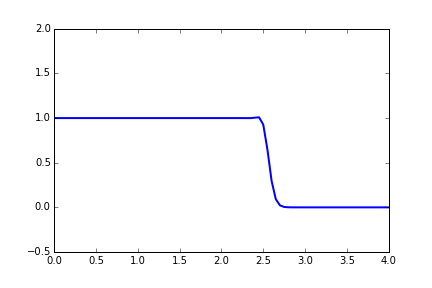
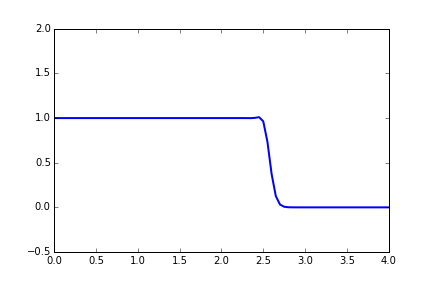
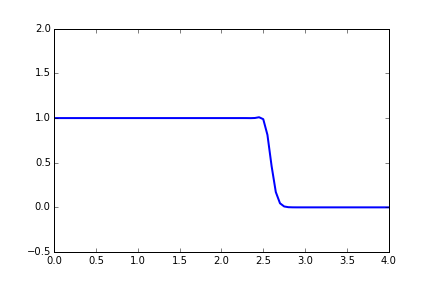
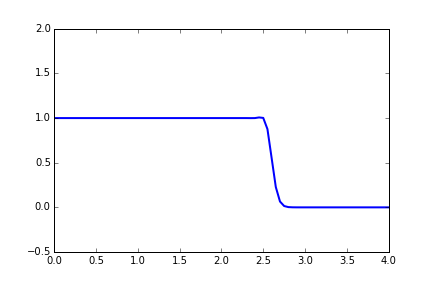
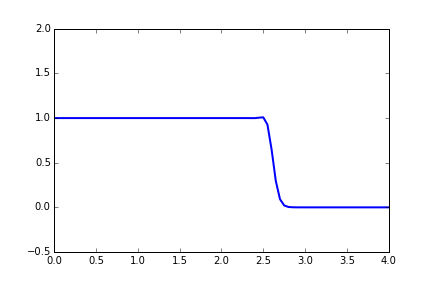
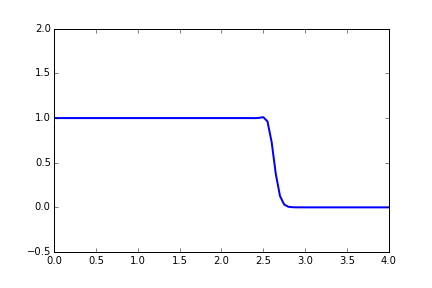
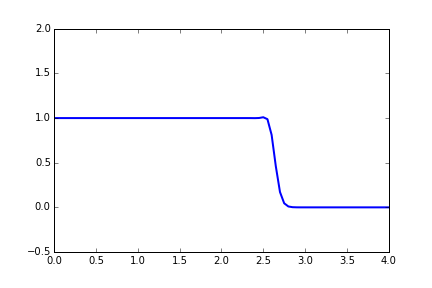
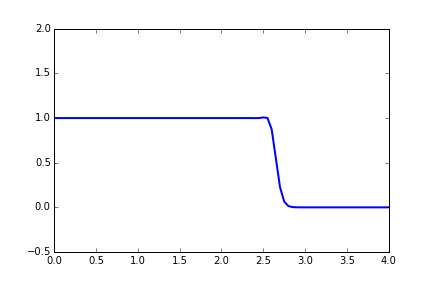
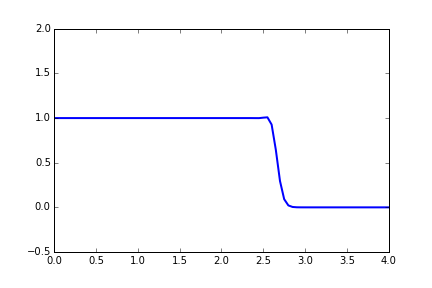
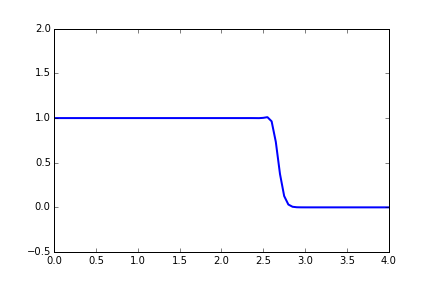
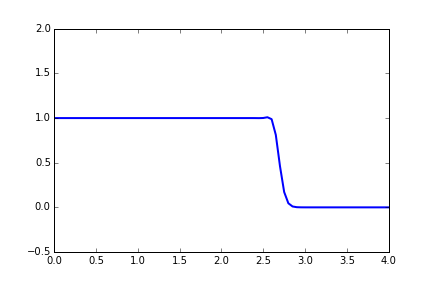
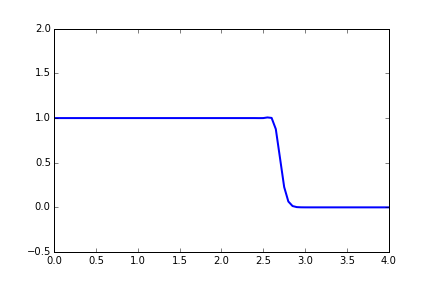
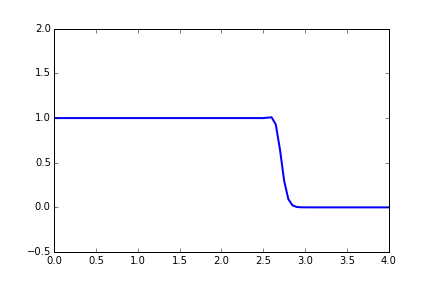
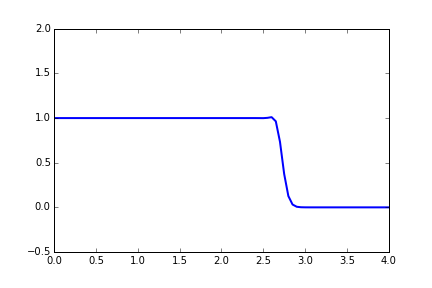
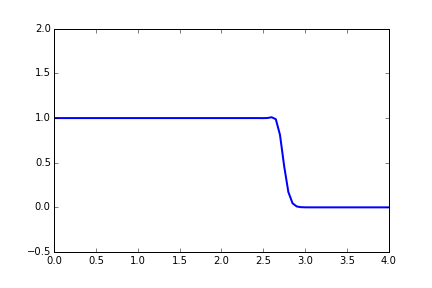
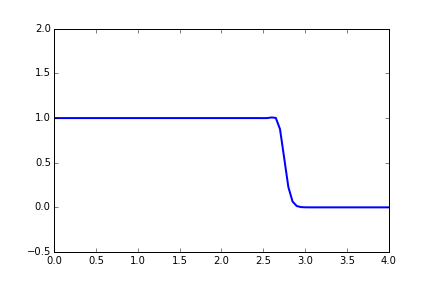
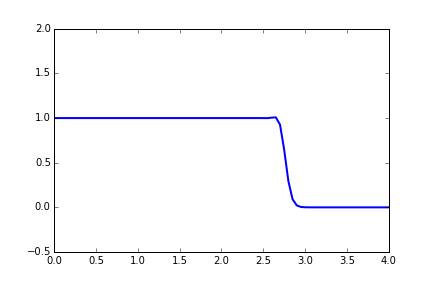
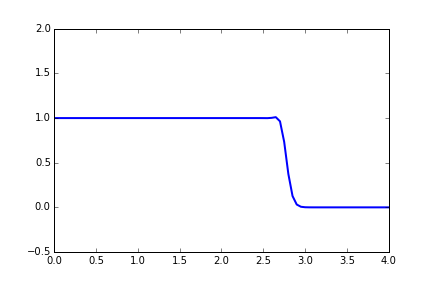
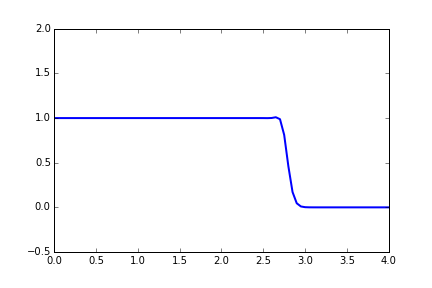
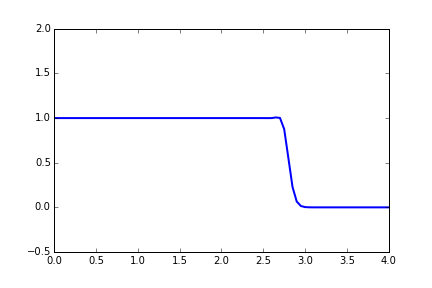
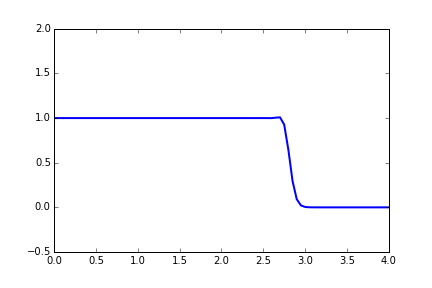
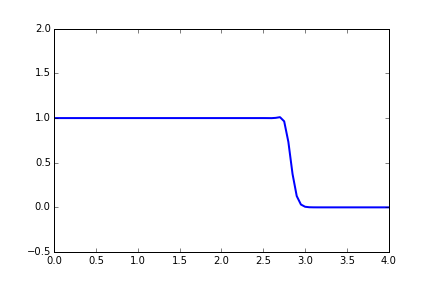
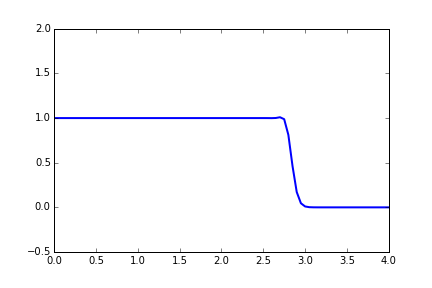
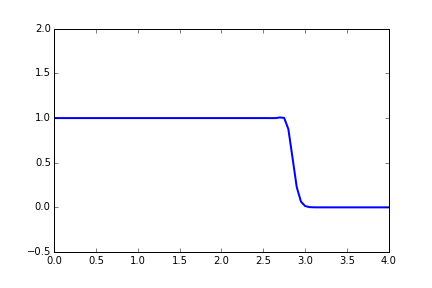
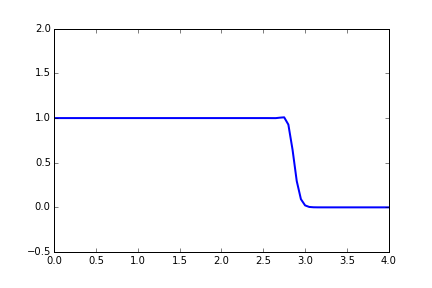
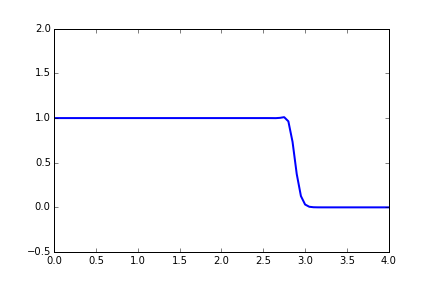

In [94]:
u = u_initial()
sigma = 1.0
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

Task 4: Choice of epsilon (damping)
The wave becomes smoother as epsilon increases. However, at larger values, it results in significant numerical diffusion and the wave loses its sharpness. A good choice for this case is eps = 0.3